In [ ]:
import os
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 08 May 22/live demo"
os.chdir(ROOT)
assert ROOT == os.getcwd()

## A simple classifier using Keras's Sequential API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [ ]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [ ]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



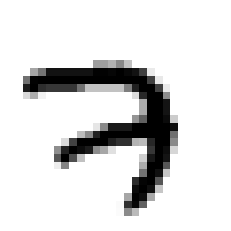

In [ ]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


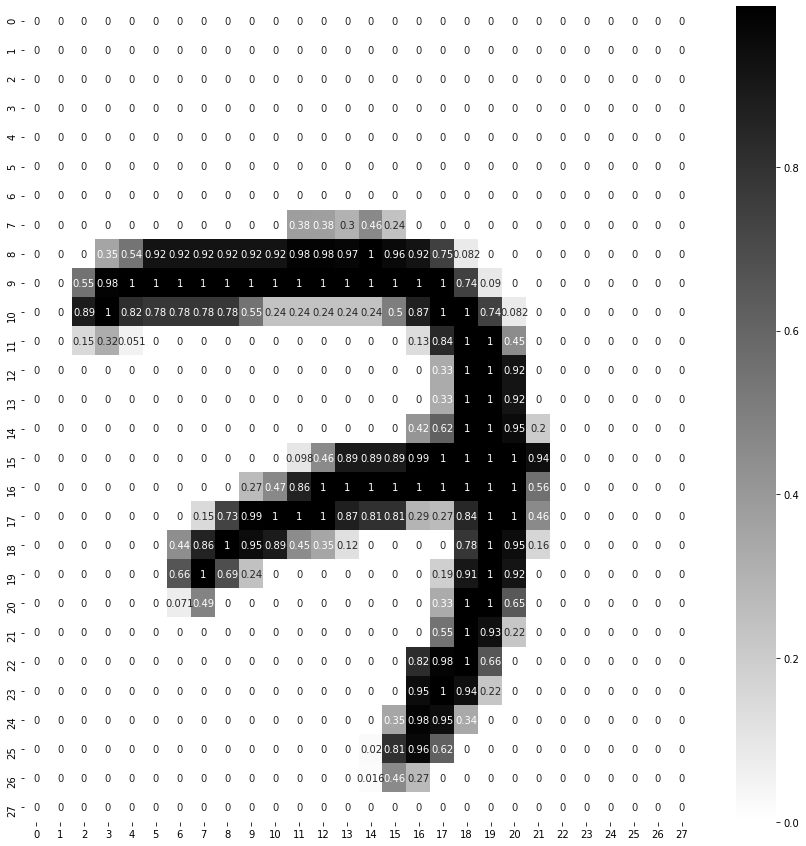

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [ ]:
# actual value of y_train
y_train[0]

7

In [ ]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [ ]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [ ]:
type(hidden1.get_weights())

list

In [ ]:
hidden1.get_weights()

[array([[-0.02120809,  0.05983081,  0.01626102, ..., -0.00215989,
         -0.02313539,  0.02887879],
        [ 0.07425819, -0.01061957,  0.04540926, ...,  0.06478031,
          0.03836916,  0.06222408],
        [ 0.01164103,  0.02279199, -0.02803959, ..., -0.01315366,
          0.047966  ,  0.04338317],
        ...,
        [ 0.02789348, -0.06487654, -0.0661849 , ..., -0.00335597,
         -0.05255748,  0.05679308],
        [-0.05684218, -0.03583364, -0.07350843, ...,  0.03868169,
         -0.03027257,  0.04284959],
        [-0.05442504, -0.06867079, -0.06340533, ...,  0.0725171 ,
         -0.02564072,  0.02403566]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[-0.02120809,  0.05983081,  0.01626102, ..., -0.00215989,
        -0.02313539,  0.02887879],
       [ 0.07425819, -0.01061957,  0.04540926, ...,  0.06478031,
         0.03836916,  0.06222408],
       [ 0.01164103,  0.02279199, -0.02803959, ..., -0.01315366,
         0.047966  ,  0.04338317],
       ...,
       [ 0.02789348, -0.06487654, -0.0661849 , ..., -0.00335597,
        -0.05255748,  0.05679308],
       [-0.05684218, -0.03583364, -0.07350843, ...,  0.03868169,
        -0.03027257,  0.04284959],
       [-0.05442504, -0.06867079, -0.06340533, ...,  0.0725171 ,
        -0.02564072,  0.02403566]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [ ]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

In [ ]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0717 - accuracy: 0.7082 - val_loss: 0.3135 - val_accuracy: 0.9112
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.9108 - val_loss: 0.2483 - val_accuracy: 0.9286
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2477 - accuracy: 0.9286 - val_loss: 0.2037 - val_accuracy: 0.9430
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2112 - accuracy: 0.9397 - val_loss: 0.1786 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1820 - accuracy: 0.9480 - val_loss: 0.1580 - val_accuracy: 0.9550
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1605 - accuracy: 0.9555 - val_loss: 0.1465 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1470 - accuracy: 0.9582 - val_loss: 0.1357 - val_accuracy:

In [ ]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [ ]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_05_21_19_56_55_.h5


In [ ]:
history.params


{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.635908,0.832964,0.313477,0.9112
1,0.292298,0.916018,0.248306,0.9286
2,0.238913,0.931364,0.203721,0.9430
3,0.204914,0.941836,0.178640,0.9494
4,0.179413,0.948727,0.157957,0.9550
5,0.159392,0.955564,0.146475,0.9616
6,0.143182,0.959509,0.135720,0.9624
7,0.130216,0.962818,0.122266,0.9646
8,0.118548,0.966691,0.114907,0.9684
9,0.108747,0.969200,0.109973,0.9684


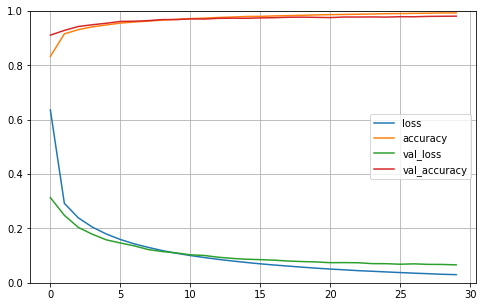

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9786


[0.06717012077569962, 0.978600025177002]

In [ ]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

In [ ]:
y_test_new = y_test[:3]

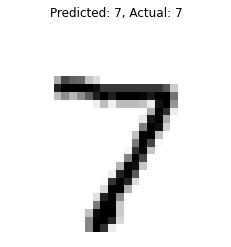

------------------------------------------------------------


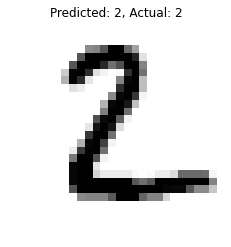

------------------------------------------------------------


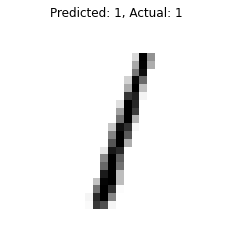

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [ ]:
weights, biases = hidden1.get_weights()


In [ ]:
weights

array([[-0.02120809,  0.05983081,  0.01626102, ..., -0.00215989,
        -0.02313539,  0.02887879],
       [ 0.07425819, -0.01061957,  0.04540926, ...,  0.06478031,
         0.03836916,  0.06222408],
       [ 0.01164103,  0.02279199, -0.02803959, ..., -0.01315366,
         0.047966  ,  0.04338317],
       ...,
       [ 0.02789348, -0.06487654, -0.0661849 , ..., -0.00335597,
        -0.05255748,  0.05679308],
       [-0.05684218, -0.03583364, -0.07350843, ...,  0.03868169,
        -0.03027257,  0.04284959],
       [-0.05442504, -0.06867079, -0.06340533, ...,  0.0725171 ,
        -0.02564072,  0.02403566]], dtype=float32)

In [ ]:
biases

array([ 2.79536527e-02, -5.16505307e-03,  8.94474685e-02,  5.57838101e-03,
        4.96681146e-02,  7.38461092e-02,  3.65980342e-02,  2.77773309e-02,
        2.16011517e-02,  1.45134917e-02,  5.55294305e-02, -4.47136015e-02,
       -1.13613429e-02,  5.24449609e-02,  3.31018306e-02,  2.28583794e-02,
        3.74752074e-03,  3.32062569e-04,  1.66307797e-03, -2.97208447e-02,
        1.95725076e-02,  1.20718423e-02,  3.65708545e-02,  1.34031372e-02,
        3.11170295e-02,  1.00770416e-02,  5.94330486e-03,  3.94092835e-02,
       -1.03164697e-02,  2.62914281e-02, -2.46020965e-02,  6.88314363e-02,
       -4.73776460e-02, -1.00439964e-02,  7.77650774e-02,  1.40986908e-02,
        1.41631737e-01,  4.54347990e-02, -3.16891968e-02,  2.46137399e-02,
        5.93968108e-02, -1.18176425e-02,  2.28712708e-02, -9.83333401e-03,
        4.38016467e-02, -2.74808705e-03,  6.19540131e-03, -7.29962438e-02,
       -1.60371065e-02, -4.99908300e-03, -2.59609763e-02, -1.43430317e-02,
       -5.16389450e-03,  